## to assess the experimental data from 5-Mar-2018 to 11-Mar-2018
   - baseline (fixed vsd): 5,6,7 Mar 2018
   - ESC cwsfhdr: 8,9,10,11 Mar 2018

In [7]:
%matplotlib inline
import pandas as pd 
import numpy  as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pylab as plt 

In [8]:
# read data file
datafn = 'ctp_experiment.gz'
print(' Reading {}'.format(datafn))
df = pd.read_csv('./' + datafn, compression='gzip')
if 'chstat' not in df.columns:
    print(' Create \'chstat\'')
    df['chstat']  = df['ch1stat']+df['ch2stat']+df['ch3stat']+df['ch4stat']
df = df[ df['chstat']>0 ].copy()

 Reading ctp_experiment.gz


 >>>> Using baseline for modeling:
      fitting error is 0.69%
      improvement of ESC over Baseline is 1.79%


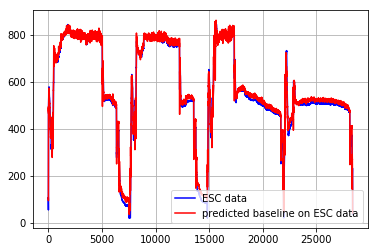

In [12]:
# split data into baseline and esc
dfBaseline = df[ df['timestamp']< '2018-03-08 00:00:00' ].copy()
dfEsc      = df[ df['timestamp']>='2018-03-08 00:00:00' ].copy()

#
xname = ['loadsys','drybulb','wetbulb']
yname = 'systotpower'

# create model using baseline
model1 = make_pipeline(PolynomialFeatures(2), LinearRegression() )
x = dfBaseline[ xname ].values.copy().reshape(-1,len(xname))
y = dfBaseline[ yname ].values.copy().reshape(-1,1)
xtest = dfEsc[ xname ].values.copy().reshape(-1,len(xname))
ytest = dfEsc[ yname ].values.copy().reshape(-1,1)
model1.fit(x,y)
train_error = (1 - model1.score(x,y)) * 100.0
yh = model1.predict(xtest)
esc_over_baseline = ( yh.sum() - ytest.sum() ) / yh.sum() * 100.0

print(' >>>> Using baseline for modeling:')
print('      fitting error is {:.2f}%'.format( train_error ))
print('      improvement of ESC over Baseline is {:.2f}%'.format( esc_over_baseline ))
plt.plot(ytest,'b',label='ESC data')
plt.plot(yh,'r',label='predicted baseline on ESC data')
plt.grid()
plt.legend(loc='best')
plt.show()

 >>>> Using ESC for modeling:
      fitting error is 1.06%
      improvement of Baseline over ESC is -1.73%


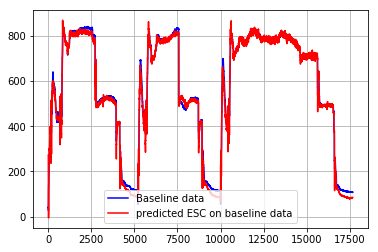

In [13]:
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression() )
x = dfEsc[ xname ].values.copy().reshape(-1,len(xname))
y = dfEsc[ yname ].values.copy().reshape(-1,1)
xtest = dfBaseline[ xname ].values.copy().reshape(-1,len(xname))
ytest = dfBaseline[ yname ].values.copy().reshape(-1,1)
model1.fit(x,y)
train_error = (1 - model1.score(x,y)) * 100.0
yh = model1.predict(xtest)
esc_over_baseline = ( yh.sum() - ytest.sum() ) / yh.sum() * 100.0
print(' >>>> Using ESC for modeling:')
print('      fitting error is {:.2f}%'.format( train_error ))
print('      improvement of Baseline over ESC is {:.2f}%'.format( esc_over_baseline ))
plt.plot(ytest,'b',label='Baseline data')
plt.plot(yh,'r',label='predicted ESC on baseline data')
plt.legend(loc='best')
plt.grid()
plt.show()